## Development, and Evaluation  of ML models

Because we are dealing with a critical electricity consumption (KWH) problem, we need a model with high performance. Here, I am going to try 4 machine learning algorithms, with the aim of finding the machine learning algorithm that works best. In addition, we will perform a precision comparison between the ML models using several metrics for the final choice. Since the project is a regression problem, the algorithms that we will choose are the following:

* K-Nearest Neighbor Regressor (KNN), Random Forest Regressor (RF), XGBoost Regressor (XGB), Linear Regression (LR)

### Development of ML model life cycle

#### 1. Load cleaned data (train and test)
#### 2. Development and evaluation of ML models
$\;\;$ 2.1 K-Nearest Neighbor (KNN)<br>
$\;\;$ 2.2 Random Forest Regressor (RF)<br>
$\;\;$ 2.3 XGBoost Regressor (XGB)<br>
$\;\;$ 2.4 Linear Regression (LR)<br>
#### 3. Comparison between ML models on the test set and train set (cross validation) 
#### 4. Hyperparametres tuning
#### 5. Conclusion

In [1]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
from datetime import datetime
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

## 1. Load cleaned data (train and test)

In [2]:
# load train and test data 

# Train data
path = "data/"
final_df_train = pd.read_csv(path+"df_train_out.csv")
X_train = final_df_train.drop(columns = ["kwh"], axis=1)
y_train = final_df_train.kwh

# Test data
path = "data/"
final_df_test = pd.read_csv(path+"df_test_out.csv")
X_test = final_df_test.drop(columns = ["kwh"], axis=1)
y_test = final_df_test.kwh

## 2. Development and evaluation of ML models

In [3]:
# Timer function
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        time = str(round(thour, 2))+":"+str(round(tmin, 2))+":"+str(round(tsec, 2))
        print('Time taken: %i hours %i minutes et %s seconds.' % (thour, tmin, round(tsec, 4)),"\n")
    return time   

In [4]:
# Metrics calculation function
def print_metrics(y_test,y_pred):
    print('Results of the evaluation of model with different Measures on test set:',"\n")
    mae = np.round(metrics.mean_absolute_error(y_test, y_pred), 3)
    print('MAE:', mae)
    rmse = np.round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 3)
    print('RMSE:', rmse)
    mesdian_abs = np.round(metrics.median_absolute_error(y_test, y_pred), 3)
    print('Median ABS Error:', mesdian_abs)
    r2_score_test = np.round(metrics.r2_score(y_test,y_pred), 3)
    print('R2 (score):', r2_score_test)
    return mae, rmse, mesdian_abs, r2_score_test 

In [5]:
# Function for running models and Metrics calculation
def run_model(model, X_train, y_train, X_test, y_test):
    start_time = timer(None) # the train timer starts from this point
    model.fit(X_train, y_train)
    print("Training:","\n")
    time_train = timer(start_time) # the train timer ends here 
    
    # Cross validation on train data set 
    kf = KFold(n_splits=5, random_state=None)
    r2_mean_cv = (cross_val_score(model , X_train, y_train, scoring="r2", cv = kf)).mean()
    print("Avg of R2 (score) based on Cross Validation with 5 folder for train set:", np.round(r2_mean_cv,3),"\n")
    
    print("="*80)
    start_time = timer(None) # the test timer starts from this point
    y_pred = model.predict(X_test)
    print("Test:","\n")
    time_test = timer(start_time) # the test timer ends here
    
    mae, rmse, mesdian_abs, r2_score_test  = print_metrics(y_test,y_pred)
    return mae, rmse, mesdian_abs, r2_score_test, r2_mean_cv, y_pred, model

### 2.1 K-Nearest Neighbor

Training: 

Time taken: 0 hours 0 minutes et 0.0122 seconds. 

Avg of R2 (score) based on Cross Validation with 5 folder for train set: 0.947 

Test: 

Time taken: 0 hours 0 minutes et 0.0237 seconds. 

Results of the evaluation of model with different Measures on test set: 

MAE: 663.049
RMSE: 1191.641
Median ABS Error: 380.5
R2 (score): 0.972

Comparison between the predicted and the actual consumption (KWH):


,Actual,Predicted
0,11486,10846.0
1,10604,9854.0
2,14658,14490.0
3,9555,9201.0
4,15845,15842.0


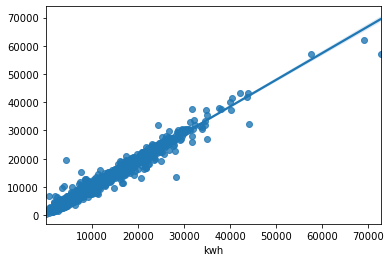

In [6]:
# K-Nearest Neighbor
KNN_mae, KNN_rmse, KNN_mesdian_abs, KNN_r2_score_test, KNN_r2_mean_cv, KNN_y_pred, KNN_model = run_model(KNeighborsRegressor(n_neighbors=2),
                                                                     X_train, y_train, X_test, y_test)
print("\n","="*80)
sns.regplot(x=y_test,y=KNN_y_pred,fit_reg=True)

# Comparison between the predicted and the actual consumption (KWH)
print("Comparison between the predicted and the actual consumption (KWH):")
df_res = pd.DataFrame({'Actual': np.round(y_test, 0), 'Predicted': np.round(KNN_y_pred, 0)})
df_res.head(5)

### 2.2 Random Forest Regressor

Training: 

Time taken: 0 hours 0 minutes et 5.4463 seconds. 

Avg of R2 (score) based on Cross Validation with 5 folder for train set: 0.971 

Test: 

Time taken: 0 hours 0 minutes et 0.0414 seconds. 

Results of the evaluation of model with different Measures on test set: 

MAE: 452.659
RMSE: 1024.258
Median ABS Error: 200.39
R2 (score): 0.979

Comparison between the predicted and the actual consumption (KWH)


,Actual,Predicted
0,11486,11226.0
1,10604,10660.0
2,14658,13621.0
3,9555,9576.0
4,15845,15923.0


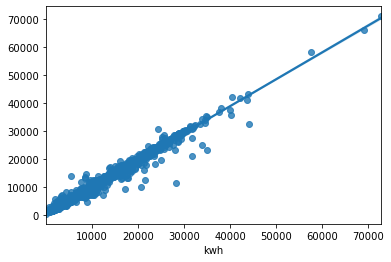

In [7]:
# RandomForestRegressor
RF_mae, RF_rmse, RF_mesdian_abs, RF_r2_score_test, RF_r2_mean_cv, RF_y_pred, RF_model = run_model(RandomForestRegressor(random_state = 42),
                                                                     X_train, y_train, X_test, y_test)

print("\n","="*80)
sns.regplot(x=y_test,y=RF_y_pred,fit_reg=True)

# Comparison between the predicted and the actual consumption (KWH)
print("Comparison between the predicted and the actual consumption (KWH)")
df_res = pd.DataFrame({'Actual': np.round(y_test, 0), 'Predicted': np.round(RF_y_pred, 0)})
df_res.head(5)

### 2.3 XGBoost Regressor

Training: 

Time taken: 0 hours 0 minutes et 0.3708 seconds. 

Avg of R2 (score) based on Cross Validation with 5 folder for train set: 0.967 

Test: 

Time taken: 0 hours 0 minutes et 0.0015 seconds. 

Results of the evaluation of model with different Measures on test set: 

MAE: 448.705
RMSE: 962.753
Median ABS Error: 263.807
R2 (score): 0.982

Comparison between the predicted and the actual consumption (KWH)


,Actual,Predicted
0,11486,11030.0
1,10604,10325.0
2,14658,14566.0
3,9555,10109.0
4,15845,15845.0


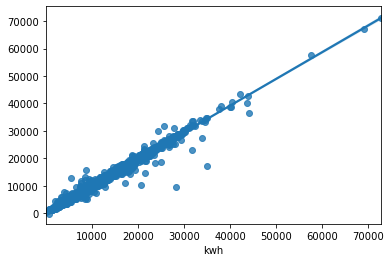

In [8]:
# XGBoost Regressor
XGB_mae, XGB_rmse, XGB_mesdian_abs, XGB_r2_score_test, XGB_r2_mean_cv, XGB_y_pred, XGB_model = run_model(XGBRegressor(),
                                                                     X_train, y_train, X_test, y_test)

print("\n","="*80)
sns.regplot(x=y_test,y=XGB_y_pred,fit_reg=True)

# Comparison between the predicted and the actual consumption (KWH)
print("Comparison between the predicted and the actual consumption (KWH)")
df_res = pd.DataFrame({'Actual': np.round(y_test, 0), 'Predicted': np.round(XGB_y_pred, 0)})
df_res.head(5)

### 2.4 Linear Regression

Training: 

Time taken: 0 hours 0 minutes et 0.0024 seconds. 

Avg of R2 (score) based on Cross Validation with 5 folder for train set: 0.999 

Test: 

Time taken: 0 hours 0 minutes et 0.0011 seconds. 

Results of the evaluation of model with different Measures on test set: 

MAE: 79.881
RMSE: 224.436
Median ABS Error: 46.107
R2 (score): 0.999

Comparison between the predicted and the actual consumption (KWH)


,Actual,Predicted
0,11486,11487.0
1,10604,10563.0
2,14658,14464.0
3,9555,9533.0
4,15845,15828.0


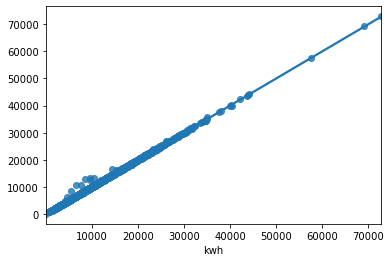

In [9]:
# Linear Regression
LR_mae, LR_rmse, LR_mesdian_abs, LR_r2_score_test, LR_r2_mean_cv, LR_y_pred, LR_model = run_model(LinearRegression(),
                                                                     X_train, y_train, X_test, y_test)

print("\n","="*80)
sns.regplot(x=y_test,y=LR_y_pred,fit_reg=True)

# Comparison between the predicted and the actual consumption (KWH)
print("Comparison between the predicted and the actual consumption (KWH)")
df_res = pd.DataFrame({'Actual': np.round(y_test, 0), 'Predicted': np.round(LR_y_pred, 0)})
df_res.head(5)

## 3. Comparison between ML models on the test set and train set (cross validation) 

In [10]:
models = ['K-Nearest Neighbor', 'Random Forest', 'XGBoost', 'Linear Regression']
f2_score_train = [KNN_r2_mean_cv, RF_r2_mean_cv, XGB_r2_mean_cv, LR_r2_mean_cv]
f2_score_test = [KNN_r2_score_test, RF_r2_score_test, XGB_r2_score_test, LR_r2_score_test]
RMSE = [KNN_rmse, RF_rmse, XGB_rmse, LR_rmse]
MAE = [KNN_mae, RF_mae, XGB_rmse, LR_mae]
Median_ABS_Error = [KNN_mesdian_abs, RF_mesdian_abs, XGB_mesdian_abs, LR_mesdian_abs]

d = {'f2_score_train_CV': f2_score_train, 'f2_score_test': f2_score_test, 'RMSE': RMSE, 'MAE': MAE,
     'Median_ABS_Error': Median_ABS_Error}
df_metrics = pd.DataFrame(d, index = models)
df_metrics

,f2_score_train_CV,f2_score_test,RMSE,MAE,Median_ABS_Error
K-Nearest Neighbor,0.946803,0.972,1191.641,663.049,380.500
Random Forest,0.970966,0.979,1024.258,452.659,200.390
XGBoost,0.967014,0.982,962.753,962.753,263.807
Linear Regression,0.999330,0.999,224.436,79.881,46.107


As we can see, in the output above, Xgboost, and Linear Regression are performing well compared to the K-Nearest Neighbor, and Random Forest. The cross-validation score (f2_score_train) helps us to decide which model we should select and which we should not go with. 

Based on the average value of f2_score_train_CV, f2_score_test, MAE and RMSE from table, we can conclude that the **Linear Regression** is the best ML model, especially in term of variance "**RMSE=224**" compared to the other ML models (PS: RMSE is a good indicator of the variance of a ML model). In addition, The LR model is faster than the other ML algorithm (time for training = **0.0036 Seconds**, time for the test = **0.0011 Seconds**)

## 4. Hyperparametres tuning

We notice that the results found by all models are satisfying, especially the result found by linear regression algorithm (LR). However, there is a possibility to optimize ML models by tuning the hyperparameters through GridSearchCV or RandomizedSearchCV methods.
We prefer to keep the models without hyperparameters tuning; in order to keep the workflow of the project simple. 


## 5. Conclusion

In this project, we build a model that predicts the electric consumption (KWH) . After building several ML models, we have used the most efficient metrics for ML model performance which are the F2 Score, RMSE, MAE, Median ABS Error. From the obtained results, we notice that the XGBoost and LR models achieved the best score, But LR is faster than all ML models based on the computation time.

In this project, the choice of algorithms is based on the input data. However, we are not limited by this 4 ML algorithms. 

k-Fold cross validation is used to test our algorithms on different parts of the train database. The f2 score is used in the process of cross validation to see the variation of our algorithm according to the change of the data.